<a href="https://colab.research.google.com/github/chyan0411/Thesis/blob/master/%E6%B2%A1%E7%94%A8swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from google.colab import drive
drive.mount('/content/drive')
# %cd "/content/drive/My Drive/Colab Notebooks"
# import import_ipynb
# from model_functions import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

i = 1
data = np.load('/content/drive/My Drive/Newdata/Post/' + str(i)+'.npy') 
label = np.load('/content/drive/My Drive/ready_data_6C/output/output.npy')

print(data.shape)

(50, 30, 116, 116)


In [ ]:
print(data[0,0,:10,:10])
# print(data[0,0,:10,0])

[[0.         0.0625924  0.08676659 0.11208412 0.0625756  0.0732296
  0.06687178 0.08219208 0.06157076 0.05914285]
 [0.0625924  0.         0.09473756 0.07895273 0.09102179 0.06232355
  0.07580675 0.07251641 0.11492615 0.03967204]
 [0.08676659 0.09473756 0.         0.10874305 0.05628271 0.08679821
  0.06402766 0.0660645  0.04305936 0.06239417]
 [0.11208412 0.07895273 0.10874305 0.         0.08890576 0.12416777
  0.11329788 0.06689069 0.06724026 0.0942047 ]
 [0.0625756  0.09102179 0.05628271 0.08890576 0.         0.06878621
  0.03519482 0.0552604  0.02606475 0.04779811]
 [0.0732296  0.06232355 0.08679821 0.12416777 0.06878621 0.
  0.07388001 0.11184766 0.05528548 0.1124113 ]
 [0.06687178 0.07580675 0.06402766 0.11329788 0.03519482 0.07388001
  0.         0.07800893 0.03017622 0.06859206]
 [0.08219208 0.07251641 0.0660645  0.06689069 0.0552604  0.11184766
  0.07800893 0.         0.04201232 0.07549963]
 [0.06157076 0.11492615 0.04305936 0.06724026 0.02606475 0.05528548
  0.03017622 0.042012

In [ ]:
m = 0
for i in range(50):
  for j in range(30):
    # for k in range(116):
      while m <=114:
        tmp = data[i,j,m,m]
        data[i,j,m,m] = data[i,j,m+1,m+1]
        data[i,j,m+1,m+1] = tmp
        m = m + 2
# m = 0
# for i in range(50):
#   for j in range(30):
#     for k in range(116):
#       while m <=114:
#         tmp = data[i,j,m,k]
#         data[i,j,m,k] = data[i,j,m+1,k]
#         data[i,j,m+1,k] = tmp
#         m = m + 2
print(data[0,0,0,:10])
print(data[0,0,:10,0])

[0.         0.0625924  0.08676659 0.11208412 0.0625756  0.0732296
 0.06687178 0.08219208 0.06157076 0.05914285]
[0.         0.0625924  0.08676659 0.11208412 0.0625756  0.0732296
 0.06687178 0.08219208 0.06157076 0.05914285]


In [ ]:
right_stroke = [4,7,8,11,12,13,14,15,16,18,21,22,23,24] 
tmp = []
j = 0
# for i in right_stroke:
while j <=114:
  a = data[:,:,:,j]
  b = data[:,:,:,j+1]
  tmp.append(b)
  tmp.append(a)
  j=j+2
data = np.array(tmp)
print(data.shape)
tmp = []
j = 0
while j <=114:
  a = data[:,:,j,:]
  b = data[:,:,j+1,:]
  tmp.append(b)
  tmp.append(a)
  j=j+2
Data = np.array(tmp)
print(Data[0,0,0,:10])




(116, 116, 50, 30)


IndexError: ignored

In [ ]:
def compress():  # 将 30个hz频道 变成3个 频道
  L =[]

  for i in range(96):
    a= 0
    b = 0
    c = 0
    New = []
    for j in range(0,2):
      a = a + data[i,j,:,:]
    a = a/2
    for j in range(2,4):
      b = b + data[i,j,:,:]
    b = b/2
    for j in range(4,6):
      c = c + data[i,j,:,:]
    c = c/2
    New.append(a)
    New.append(b)
    New.append(c)
    L.append(New)
  L = np.array(L)

  return L

A = compress()



In [ ]:
print(data.shape)
print(label.shape)
print(A.shape)
A = np.reshape(A, (96,116,116,3)) #变成 length,width, cns 标准 3d图像
print(A.shape)

(96, 6, 116, 116)
(96, 3)
(96, 3, 116, 116)
(96, 116, 116, 3)


In [ ]:
data, label = shuffle(data, label)
split = 72
train_data = data[:split]
train_label = label[:split]
test_data = data[split:]
test_label = label[split:]
train_data1 = A[:split]
test_data1 = A[split:]

In [ ]:
model1 = get_model4()
model2 = get_model5()
# model3 = get_model6()
# model1.summary()
# model2.summary()
# model3.summary()

In [ ]:
history1 = model1.fit(train_data, train_label, epochs = 100, verbose=0)
history2 = model2.fit(train_data, train_label, epochs = 100, verbose=0)
# history3 = model3.fit(train_data1, train_label, epochs = 10, verbose=0)

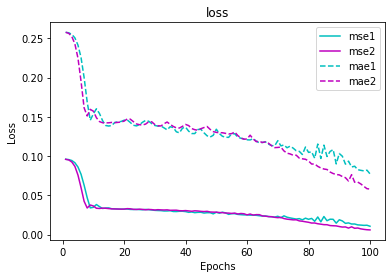

In [ ]:
mse1 = history1.history['loss']
mse2 = history2.history['loss']
mae1 = history1.history['mean_absolute_error']
mae2 = history2.history['mean_absolute_error']
# val_loss = history.history['val_loss']
# acc = history.history['acc']
# val_acc=history.history['val_acc']
epochs = range(1,len(mse1) +1)
plt.plot(epochs, mse1, 'c', label='mse1')
plt.plot(epochs, mse2, 'm', label='mse2')
plt.plot(epochs, mae1, 'c--', label='mae1')
plt.plot(epochs, mae2, 'm--', label='mae2')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [ ]:
comparision1 = model1.predict(test_data)
comparision2 =model2.predict(test_data)


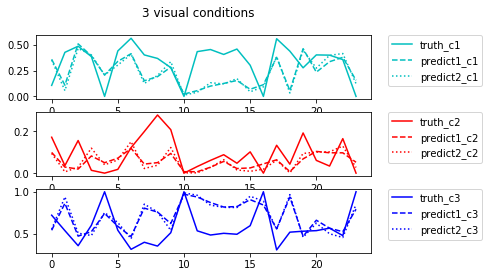

In [ ]:
x_data = range(24)
y_data_c1 = test_label[:,0]
y_data_c2 = test_label[:,1]
y_data_c3 = test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]
y_predict2_c1 = comparision2[:,0]
y_predict2_c2 = comparision2[:,1]
y_predict2_c3 = comparision2[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
fig.suptitle('3 visual conditions') 


predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')

predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show() 
fig.savefig('/content/drive/My Drive/ready_data_6C/matrix_input/1.png' ,bbox_inches='tight')

In [ ]:
print(comparision1.shape)
y_data_c1 = test_label[:,0]
print(y_data_c1.shape)

(24, 3)
(24,)


In [ ]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  y_data_c1 = test_label[:,0]
  y_data_c2 = test_label[:,1]
  y_data_c3 = test_label[:,2]
  y_predict1_c1 = predict[:,0]
  y_predict1_c2 = predict[:,1]
  y_predict1_c3 = predict[:,2]
  tmp1 = 0
  tmp2 = 0
  tmp3 = 0
  for i in range(24):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1 /24 
  c2 = tmp2 /24
  c3 = tmp3 /24
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1 , c2 ,c3 


In [ ]:
# from keras import backend as K
Model1 = calculate_mse(comparision1)
Model2 = calculate_mse(comparision2)

In [ ]:
print(Model1)
print(Model2)

(0.04622297187687762, 0.007082256850881958, 0.06370936894601918)
(0.04765147772947598, 0.007218520456619238, 0.06742282941295046)
